IMPORTING ALL THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

LOADING THE DATA

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.csv')
data = data[data['F6'].str.isnumeric()]
columns = list(data.columns)
data = data[columns[1:]].drop_duplicates()
data.rename({'F1': 'Clump Thickness',"F2": "Uniformity of Cell Size",       
   "F3":"Uniformity of Cell Shape",
   "F4": "Marginal Adhesion",             
   "F5": "Single Epithelial Cell Size",   
   "F6": "Bare Nuclei",                   
   "F7": "Bland Chromatin",               
   "F8": "Normal Nucleoli",               
   "F9": "Mitoses"}, axis=1, inplace=True)
columns = list(data.columns)
x, y = data[columns[1:-1]], data[columns[-1]]
x.head()

,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1,1,1,2,1,3,1,1
1,4,4,5,7,10,3,2,1
2,1,1,1,2,2,3,1,1
3,8,8,1,3,4,3,7,1
4,1,1,3,2,1,3,1,1


In [3]:
x = x.dropna()
x.head(5)

,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1,1,1,2,1,3,1,1
1,4,4,5,7,10,3,2,1
2,1,1,1,2,2,3,1,1
3,8,8,1,3,4,3,7,1
4,1,1,3,2,1,3,1,1


In [4]:
scaler = StandardScaler()
scaler = scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.head()

,0,1,2,3,4,5,6,7
0,-0.992321,-1.043323,-0.870426,-0.766047,-0.981954,-0.453224,-0.836003,-0.441855
1,-0.068578,-0.087298,0.397445,1.271602,1.339916,-0.453224,-0.540440,-0.441855
2,-0.992321,-1.043323,-0.870426,-0.766047,-0.723968,-0.453224,-0.836003,-0.441855
3,1.163079,1.187401,-0.870426,-0.358517,-0.207997,-0.453224,0.937376,-0.441855
4,-0.992321,-1.043323,-0.236491,-0.766047,-0.981954,-0.453224,-0.836003,-0.441855


SPLITTING THE DATA INTO TRAINING AND TESTING

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

BUILDING KNN MODELS FOR K VALUES 3,5,10

In [6]:
for i in [3,5,10]:
    print('WITH K = {0}:'.format(i))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("confusion matrix: \n", confusion_matrix(y_test,y_pred))
    print("classification report: \n",classification_report(y_test,y_pred))
    print("\n\n\n")

WITH K = 3:
confusion matrix: 
 [[72  4]
 [ 4 55]]
classification report: 
               precision    recall  f1-score   support

           2       0.95      0.95      0.95        76
           4       0.93      0.93      0.93        59

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135





WITH K = 5:
confusion matrix: 
 [[70  6]
 [ 4 55]]
classification report: 
               precision    recall  f1-score   support

           2       0.95      0.92      0.93        76
           4       0.90      0.93      0.92        59

    accuracy                           0.93       135
   macro avg       0.92      0.93      0.92       135
weighted avg       0.93      0.93      0.93       135





WITH K = 10:
confusion matrix: 
 [[72  4]
 [ 4 55]]
classification report: 
               precision    recall  f1-score   support

           2       0.95      0.95      0.95        76


In [7]:
error_rate = []
for i in tqdm(range(1,40)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

100%|██████████████████████████████████████████| 39/39 [00:00<00:00, 236.25it/s]


Text(0, 0.5, 'Error Rate')

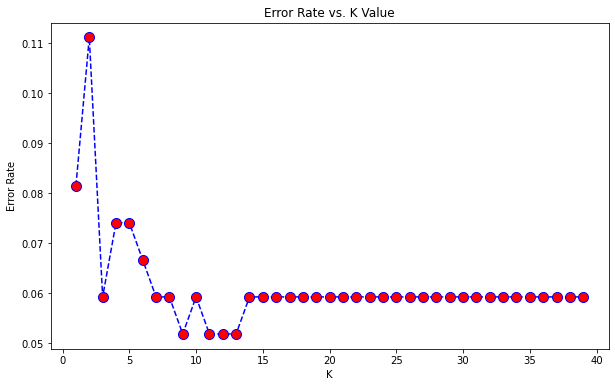

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

 - Since the error rate is not fluctuating much from k= 12 so we can consider a moderate k value as k = 15